In [3]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('atlantis_citizens_final')

In [5]:
df

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2
...,...,...,...,...,...,...,...,...,...,...
15746,CIT_10602,Seaweed,Mariana Plaza,Merchant,2896.0,428.0,59.0,Sea Scooter,Mariana Plaza,268659a4
15747,CIT_0865,Seaweed,Coral Slums,Miner,1671.0,100.0,47.0,No Vehicle,Mariana Plaza,ca287a73
15748,CIT_0809,Exotic Imports,Mariana Plaza,Scribe,4656.0,756.0,53.0,Fin Bicycle,Mariana Plaza,717ca395
15749,CIT_10750,Seafood,The Golden Reef,Merchant,17529.0,3961.0,72.0,No Vehicle,The Golden Reef,34fb8c73


In [6]:
#Q1 start
# 1 = indicates that people commutes out for work, 0 = indicates works in same district

df["Commute_Out"] = (df["District_Name"] != df["Work_District"]).astype(int)

df[["District_Name", "Work_District", "Commute_Out"]].head()


,District_Name,Work_District,Commute_Out
0,Coral Slums,Mariana Plaza,1
1,Coral Slums,Deep Trench,1
2,Mariana Plaza,Deep Trench,1
3,Deep Trench,Deep Trench,0
4,Deep Trench,Deep Trench,0


In [7]:
district_commute = (
    df.groupby("District_Name")["Commute_Out"]
      .mean()
      .reset_index()
)

In [8]:
# Converts to percentage
district_commute["Commute_Out_Percent"] = district_commute["Commute_Out"] * 100

In [9]:
# Sort by highest commuting
district_commute = district_commute.sort_values(
    by="Commute_Out_Percent",
    ascending=False
)

In [10]:
district_commute

,District_Name,Commute_Out,Commute_Out_Percent
3,The Golden Reef,0.728747,72.874662
0,Coral Slums,0.664747,66.474728
1,Deep Trench,0.632666,63.266610
2,Mariana Plaza,0.632457,63.245670


In [11]:
occupation_commute = (
    df.groupby("Occupation")["Commute_Out"]
      .mean()
      .reset_index()
)

In [12]:
# Converts to percentage
occupation_commute["Commute_Out_Percent"] = occupation_commute["Commute_Out"] * 100

In [13]:
# Sort by highest commuting
occupation_commute.sort_values(
    by="Commute_Out_Percent",
    ascending=False
)

,Occupation,Commute_Out,Commute_Out_Percent
2,Miner,0.701783,70.178336
0,Fisher,0.694834,69.483418
1,Merchant,0.676096,67.609618
4,Warrior,0.651374,65.137355
3,Scribe,0.608092,60.809203


In [14]:
# Convert the commuting districts into a Python list
top_district_names = district_commute["District_Name"].tolist()

In [15]:
# Groups data by District and Occupation
occupation_by_district = (
    df[df["District_Name"].isin(top_district_names)]
    .groupby(["District_Name", "Occupation"])["Commute_Out"]
    .mean()
    .reset_index()
)

In [16]:
# Converts to percentage
occupation_by_district["Commute_Out_Percent"] = (
    occupation_by_district["Commute_Out"] * 100
)

In [17]:
#Sort
occupation_by_district.sort_values(
    by=["District_Name", "Commute_Out_Percent"],
    ascending=[True, False]
)

,District_Name,Occupation,Commute_Out,Commute_Out_Percent
1,Coral Slums,Merchant,0.907850,90.784983
3,Coral Slums,Scribe,0.889610,88.961039
4,Coral Slums,Warrior,0.769231,76.923077
0,Coral Slums,Fisher,0.707027,70.702703
2,Coral Slums,Miner,0.497255,49.725490
8,Deep Trench,Scribe,0.915638,91.563786
6,Deep Trench,Merchant,0.885659,88.565891
7,Deep Trench,Miner,0.700873,70.087336
5,Deep Trench,Fisher,0.620860,62.085976
9,Deep Trench,Warrior,0.477160,47.716015


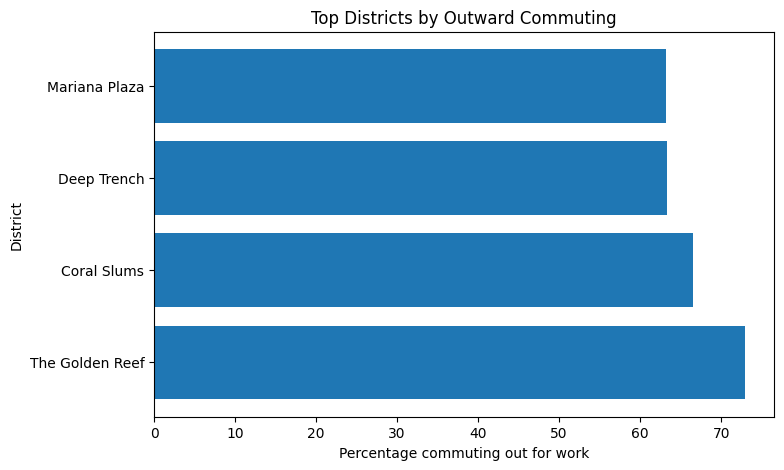

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(
    district_commute["District_Name"].head(8),
    district_commute["Commute_Out_Percent"].head(8)
)
plt.xlabel("Percentage commuting out for work")
plt.ylabel("District")
plt.title("Top Districts by Outward Commuting")
plt.show()
#Q1 end


In [19]:
#Q2 start
# Average wealth of district
district_wealth = (
    df.groupby("District_Name")["Wealth_Index"]
      .mean()
      .reset_index()
)

In [20]:
district_wealth

,District_Name,Wealth_Index
0,Coral Slums,3371.414207
1,Deep Trench,4806.795825
2,Mariana Plaza,8535.553804
3,The Golden Reef,18726.909656


In [21]:
# Richest district
richest_district = district_wealth.loc[
    district_wealth["Wealth_Index"].idxmax()
]

In [22]:
# Poorest district
poorest_district = district_wealth.loc[
    district_wealth["Wealth_Index"].idxmin()
]

In [23]:
richest_district, poorest_district

(District_Name    The Golden Reef
 Wealth_Index        18726.909656
 Name: 3, dtype: object,
 District_Name    Coral Slums
 Wealth_Index     3371.414207
 Name: 0, dtype: object)

In [24]:
# How many times wealthier is the average citizen in the richestdistrict compared to the poorest?
wealth_ratio = richest_district["Wealth_Index"] / poorest_district["Wealth_Index"]
wealth_ratio
#Q2 end

np.float64(5.554615512839325)

In [25]:
# Q3 start
# dropping columns having null values 
newdf1 = df[["House_Size_sq_ft", "Life_Expectancy"]].dropna()

In [34]:
# finding correlation
correlation = newdf1["House_Size_sq_ft"].corr(newdf1["Life_Expectancy"])
correlation

np.float64(0.7977717844528219)

In [35]:
corr = correlation
if abs(corr) < 0.1:
    print("No Correlation")
elif 0.1 <= abs(corr) < 0.3:
    print("Weak Correlation")
elif 0.3 <= abs(corr) < 0.5:
    print("Moderate Correlation")
else:
    print("Strong Correlation")
#Q3 end

Strong Correlation


In [36]:
#Q4 start
# dropping columns having null values 
newdf2 = subset = df[["Wealth_Index", "Diet_Type"]].dropna()

In [37]:
#finding average income of each diet
avg_income_diet = newdf2.groupby("Diet_Type")["Wealth_Index"].mean().reset_index()
avg_income_diet

,Diet_Type,Wealth_Index
0,Exotic Imports,10366.435328
1,Seafood,9966.829105
2,Seaweed,8261.324093


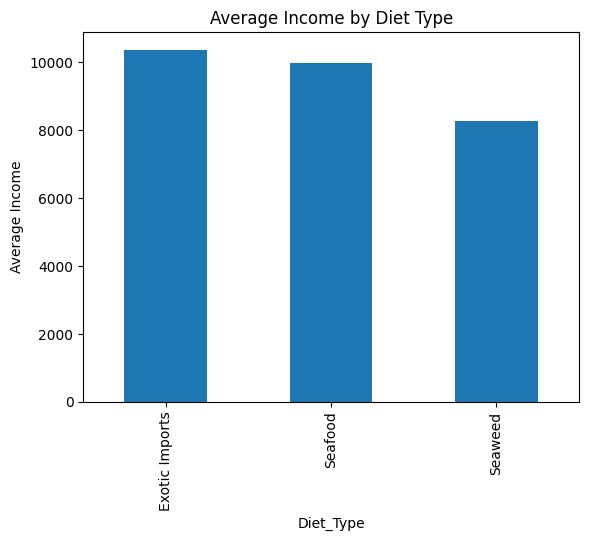

In [38]:
#plotting it on bar graph
diet_income = newdf2.groupby("Diet_Type")["Wealth_Index"].mean()
diet_income.plot(kind="bar")
plt.ylabel("Average Income")
plt.title("Average Income by Diet Type")
plt.show()
#Q4 end

In [39]:
#Q5 start
# checking uniqueness of Bio Hash
bio_hash_uniqueness = df['Bio_Hash'].nunique() 
if(bio_hash_uniqueness == len(df)) :
    print("Bio Hash Is Unique")
else:
    print("Bio Hash Is Not Unique")


Bio Hash Is Unique


In [40]:
# Bio Hash reltion with Occupation
print(df['Occupation'].value_counts())

Occupation
Merchant    3535
Warrior     3531
Fisher      3136
Miner       3028
Scribe      2521
Name: count, dtype: int64


In [41]:
#checking if same biohash in different occupation
biohash_occupation_map = (
    df.groupby("Bio_Hash")["Occupation"]
      .nunique()
      .reset_index(name="Occupation_Count")
)
biohash_occupation_map.sort_values(
    by="Occupation_Count",
    ascending=False
)
biohash_occupation_map
# therefore biohash no relation with any occupation
#Q5 end

,Bio_Hash,Occupation_Count
0,0000aff5,1
1,0002654e,1
2,0004c249,1
3,0007e754,1
4,0009ab53,1
...,...,...
15746,fff1df23,1
15747,fff450b4,1
15748,fff68516,1
15749,fff6d34a,1


In [42]:
#Q6 Which districts have the highest proportion of residents working outside their home district,
# and how does this vary by occupation?
#Q6 start
# indicates that people commutes out for work
df["Commute_Out"] = df["District_Name"] != df["Work_District"]

In [44]:
# finding percentage of people in each district who commute out
district_commute = (
    df.groupby("District_Name")["Commute_Out"]
      .mean()
      .sort_values(ascending=False)
)
district_commute
# Q6 end

District_Name
The Golden Reef    0.728747
Coral Slums        0.664747
Deep Trench        0.632666
Mariana Plaza      0.632457
Name: Commute_Out, dtype: float64

In [46]:
#Q7 Do citizens with higher wealth exhibit different dietary patterns?
# grouping them  in accordance with thier diet and finding average wealth of the person
diet_wealth = (
    df.groupby("Diet_Type")["Wealth_Index"]
      .mean()
      .sort_values(ascending=False)
)

diet_wealth

Diet_Type
Exotic Imports    10366.435328
Seafood            9966.829105
Seaweed            8261.324093
Name: Wealth_Index, dtype: float64

In [48]:
# Q8 Does vehicle ownership correlate with wealth levels?
# grouping them  in accordance with the vehicle owned and finding average wealth of the person
vehicle_wealth = (
    df.groupby("Vehicle_Owned")["Wealth_Index"]
      .mean()
      .sort_values(ascending=False)
)
vehicle_wealth

Vehicle_Owned
Royal Submarine    168498.883929
Submarine           15998.217372
No Vehicle           8287.017580
Sea Scooter          6368.997100
Fin Bicycle          6073.819847
Name: Wealth_Index, dtype: float64

In [49]:
# Q9 Does life expectancy differ significantly across occupations?
# grouping them  in accordance with the occupation and finding average life expected of the person
occupation_life = (
    df.groupby("Occupation")["Life_Expectancy"]
      .mean()
      .sort_values(ascending=False)
)
occupation_life

Occupation
Merchant    69.716696
Scribe      59.357999
Miner       47.877762
Fisher      42.960119
Warrior     40.389443
Name: Life_Expectancy, dtype: float64

In [50]:
# Q10 Which districts show the highest internal inequality in wealth?
#Q10 start
# grouping them  in accordance with the district and finding standard deviation 
district_inequality = (
    df.groupby("District_Name")["Wealth_Index"]
      .std()
      .sort_values(ascending=False)
)
district_inequality

District_Name
The Golden Reef    32704.904400
Mariana Plaza      12743.020842
Deep Trench         7132.310746
Coral Slums         4981.814211
Name: Wealth_Index, dtype: float64

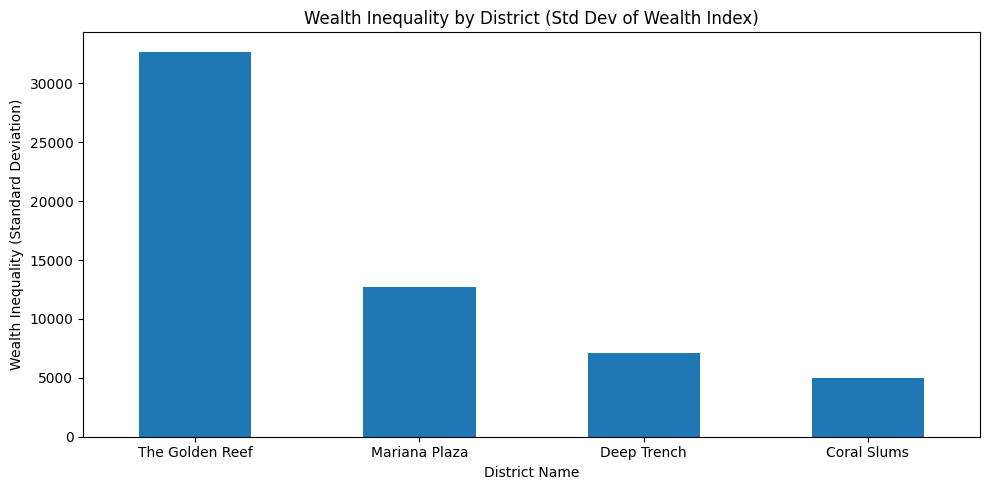

In [57]:
# plotting them to look into the reality
plt.figure(figsize=(10, 5))
district_inequality.plot(kind="bar")
plt.title("Wealth Inequality by District (Std Dev of Wealth Index)")
plt.xlabel("District Name")
plt.ylabel("Wealth Inequality (Standard Deviation)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#Q10 end

In [59]:
#Q11 Are extreme wealth values driven by specific occupations or spread across all jobs?
#Q11 start
# split citizen into top 10% richest and bottom 10% poorest
top_wealth = df["Wealth_Index"].quantile(0.9)
bottom_wealth = df["Wealth_Index"].quantile(0.1)

In [62]:
# compares the distribution of occupations among the top 10% and bottom 10% of citizens based on wealth
top_occ = df[df["Wealth_Index"] >= top_wealth]["Occupation"].value_counts(normalize=True)
bottom_occ = df[df["Wealth_Index"] <= bottom_wealth]["Occupation"].value_counts(normalize=True)
top_occ, bottom_occ 
#Q11 end

(Occupation
 Merchant    0.541497
 Warrior     0.151701
 Scribe      0.136054
 Miner       0.127211
 Fisher      0.043537
 Name: proportion, dtype: float64,
 Occupation
 Fisher      0.379404
 Warrior     0.212060
 Miner       0.209350
 Scribe      0.121274
 Merchant    0.077913
 Name: proportion, dtype: float64)

In [63]:
# Q12 Do citizens following different diet types exhibit noticeable differences in life expectancy, 
# and are these differences statistically meaningful?
# Q12 start
#  Group data by diet type and calculate statistics for life expectancy
diet_life = (
    df.groupby("Diet_Type")["Life_Expectancy"]
      .agg(["mean", "std", "count"])
      .sort_values("mean", ascending=False)
)
diet_life

,mean,std,count
Diet_Type,,,
Seaweed,55.420387,15.355431,5062
Seafood,53.395899,16.423532,5072
Exotic Imports,46.862083,16.682819,5003


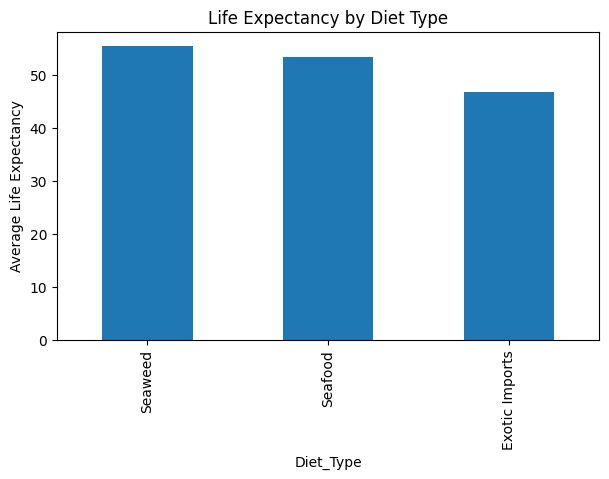

In [64]:
# Plot average life expectancy for each diet type
diet_life["mean"].plot(kind="bar", figsize=(7,4))
plt.ylabel("Average Life Expectancy")
plt.title("Life Expectancy by Diet Type")
plt.show()